In [1]:
import numpy as np
import matplotlib.pyplot as plt

\begin{equation}
\left< F(\sigma^2) \right> = 2 \int_{\delta_c}^{\infty} d \delta  \,\Pi_0( \delta , \sigma^2)
\end{equation}


\begin{equation}
\mathcal{P}_F (F) = 2 \mathcal{P}_{\delta} \,\Pi_0( \delta , \sigma^2) ?
\end{equation}

Possible approach,

 - Generate a random $\delta$ field from $P(k)$
 - Calculate the distribution of first upcrossings at a fixed scale for multiple realisations
     - I would expect it to be more important at large masses, larger scales (although Poisson noise could dominate here)

# Generate gaussian field

In [2]:
def P(k):
    A = 100
    alpha = -1
    return A * k** alpha

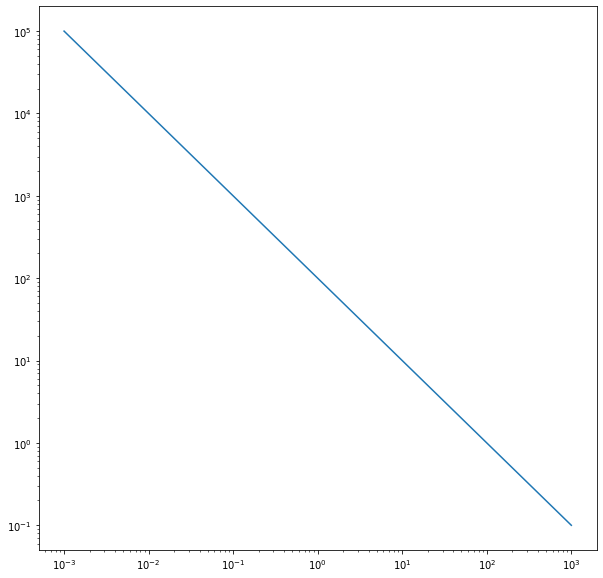

In [3]:
kk = np.logspace( -3 , 3 , 1000 )
plt.figure( figsize = ( 10 , 10 ) )
plt.plot( kk , P( kk ) )
plt.yscale('log')
plt.xscale('log')

In [4]:
npix = 256000
delta_wx = np.random.normal( loc = 0.0 , scale = 1/npix , size = [ npix , ] )
delta_wk = np.fft.fft( delta_wx )

kvector = np.fft.fftfreq( len( delta_wx ) ) * len( delta_wx )
#kgrid = np.meshgrid( kvector, kvector )
knorms = np.sqrt(kvector**2)

ps = P( knorms )
ps[ knorms == 0 ] = 0

delta_pk = ps**0.5 * delta_wk

delta_px = np.fft.ifft( delta_pk )


/tmp/ipykernel_31238/3988784926.py:4: RuntimeWarning: divide by zero encountered in reciprocal
  return A * k** alpha


In [5]:
kvector.shape

(256000,)

In [6]:
delta_pk.shape

(256000,)

/pbs/home/c/cmurray/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/pbs/home/c/cmurray/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


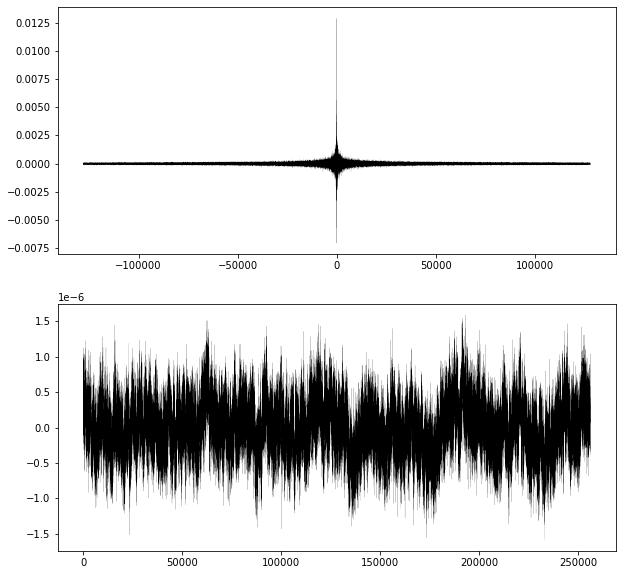

In [7]:
plt.figure( figsize = ( 10 , 10 ) )
plt.subplot( 211 )
plt.plot( kvector ,  delta_pk , 'k--' , lw = 0.1  )

plt.subplot( 212 )
plt.plot( delta_px  , 'k-' , lw = 0.1 )

# Calculate smoothed field about different points

In [8]:
def W_tilde( k , R ):
    kf = 1/R
    if k - kf < 0:
        return 0
    return 1 

W_tilde = np.vectorize( W_tilde )

In [9]:
np.log10( np.min( 1 / knorms ) ) , np.log10( np.max( 1 / knorms[1:] ) )

/tmp/ipykernel_31238/1145173067.py:1: RuntimeWarning: divide by zero encountered in true_divide
  np.log10( np.min( 1 / knorms ) ) , np.log10( np.max( 1 / knorms[1:] ) )


(-5.107209969647869, 0.0)

In [10]:
RR = np.logspace( -2.1 , -1 , 1000 )
delta_px_R =  [ np.fft.ifft( delta_pk  * W_tilde( knorms , R )) for R in RR  ]
delta_px_R = np.array( delta_px_R )

In [11]:
delta_px_R.shape

(1000, 256000)

In [12]:
len( delta_px_R.T[0] )

1000

In [13]:
# plt.figure( figsize = ( 10 , 10 ))
# for i in np.arange( 0 , 20 ):
#     plt.plot( RR ,  delta_px_R.T[ i * 100 ].imag )
# plt.xscale('log')

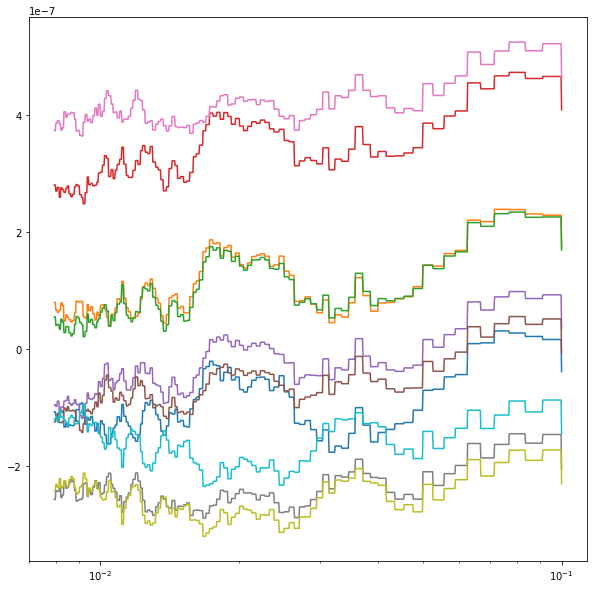

In [14]:
plt.figure( figsize = ( 10 , 10 ))
for i in np.arange( 0 , 10 ):
    plt.plot( RR ,  delta_px_R.T[ i * 200 ].real )
plt.xscale('log')

# Count the first upcrosssings

In [15]:
len( delta_px_R.T )

256000

In [16]:
R_first_crossing = []
delta_px_R_first_crossing = []

# for each different position
for i in np.arange( 0 , len( delta_px_R.T ) ):
    # find the R value at first crossing (if it crosses )
    dx = np.abs( delta_px_R.T[ i ] - 0. )
    if np.min( dx ) < 1e-3:
        j = np.argmin( dx )
        R_first_crossing.append( RR[j] )
        delta_px_R_first_crossing.append( delta_px_R.T[i][j].real )

In [17]:
np.mean( delta_px_R_first_crossing ),  np.var( delta_px_R_first_crossing )

(1.8267749640022212e-10, 4.3309661227001205e-14)

In [18]:
len( delta_px_R_first_crossing )

256000

In [19]:
np.log10( np.min( R_first_crossing ) ) , np.max( R_first_crossing )

(-2.1, 0.1)

In [20]:
R_bins = np.logspace( -2.1 , -1 , 200 )
R_cents = ( R_bins[1:] + R_bins[:-1] )
R_fc_hist, _  = np.histogram( R_first_crossing , bins = R_bins )

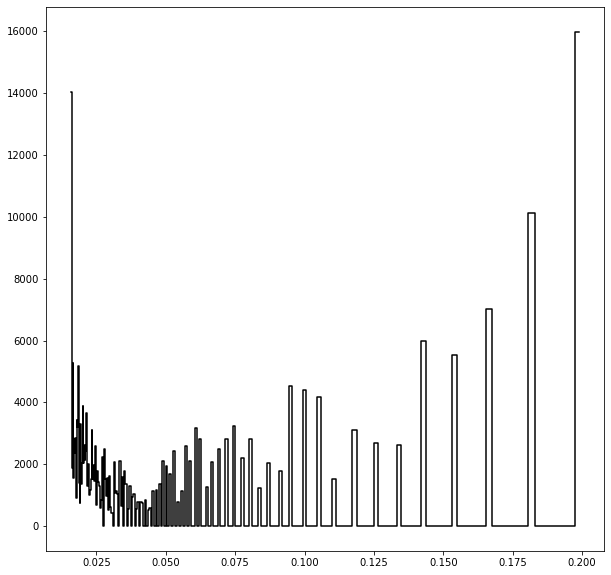

In [21]:
plt.figure( figsize = ( 10 , 10 ) )
plt.plot( R_cents , R_fc_hist , 'k-' , drawstyle='steps-mid')

# Calculate the PDF of the first crossings fraction

In [ ]:
# generate many random realisations 

In [ ]:
# remeasure R_fc_hist    

In [ ]:
# look at the PDF

In [15]:
# the probability distribution of reaching delta give sigma2
def Pi0( delta , sigma2 ):
    return np.exp( delta**2 / ( 2 * sigma2 ) ) / np.sqrt( 2 * sigma2 )

def Pi( delta , sigma2 ):
    return Pi0( delta , sigma2 ) - Pi0( 2* delta_c - delta , sigma2 )

def f( sigma ):
    return

In [ ]:
# pdf of collapsed volumes
def pdf_F( sigma2 ):
    return Pi

In [12]:
def p_delta_c( sigma2 , delta_c0 , Db , beta , gamma ):
    av_delta_c = func_av_delta_c( sigma2 , delta_c0 , beta , gamma )
    return np.exp( -0.5 * ( delta_c - av_delta_c )**2 / Db )/np.sqrt(2*np.pi * Db)

def func_av_delta_c( sigma2 , delta_c0 , beta , gamma ):
    return delta_c0 + beta * sigma2**gamma

def p_sigma2( sigma2 , delta_c0 , Db , beta , gamma ):
    return p_delta_c( sigma2 , delta_c0 , Db , beta , gamma ) * np.abs( 2 * beta * gamma * ( sigma2**0.5 ) **(2*gamma -1 ) )

In [13]:
plt.figure( figsize = ( 10 , 10 ))
sigma2 = np.linspace( -3 , 1 , 100 )
plt.plot( sigma2 , p_sigma2( sigma2 , 1.686 , 0.3 , 1 , 1 ))

NameError: name 'delta_c' is not defined

<Figure size 720x720 with 0 Axes>